<a href="https://colab.research.google.com/github/ubinix-warun/mad-bootcamp-2024/blob/main/colab/MAD_week2_1_unsupervise_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This notebook is a part of chapter 4.5***

# 1. Make dataset for unsupervised learning

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate random data
X, y_true = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42, cluster_std=1.5)

# Convert to DataFrame for better visualization
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Display first few rows of the dataset
print("Unsupervised Learning Dataset:")
print(data.head())


Unsupervised Learning Dataset:
   Feature1  Feature2
0 -8.413396  6.935165
1 -5.766484 -6.431171
2 -6.042137 -6.766102
3  3.950837  0.698403
4  4.250492 -0.281545


#2. Visualize some informative data from this dataset

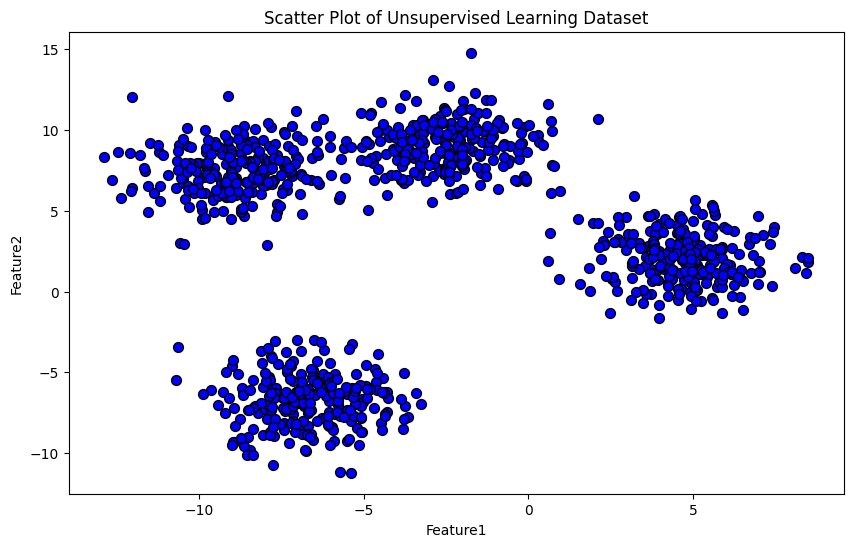

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature1'], data['Feature2'], c='blue', marker='o', edgecolor='black', s=50)
plt.title('Scatter Plot of Unsupervised Learning Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

#3. Find optimal $k$ using the Elbow method

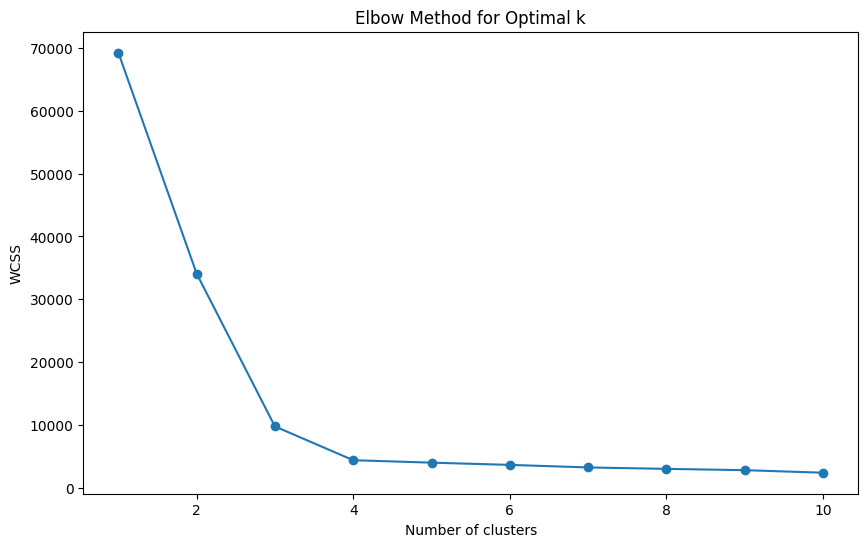

In [ ]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#4. Solve the problem using KMeans clustering with optimal $k$

In [ ]:
# Based on the elbow method, let's choose k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")

Silhouette Score for k=4: 0.6876600436588094


## Silhouette score
For data point $i\in C_I$ (data point i in the cluster $C_I$), let
$$a(i)=\frac{1}{|C_I|-1}\sum_{j\in C_I, i\neq j} d(i,j)$$

be the mean distance between $i$ and all other data points in the same cluster, where $|C_{I}|$ is the number of points belonging to cluster $|C_{I}|$, and $d(i,j)$ is the distance between data points $i$ and $j$ in the cluster $|C_{I}|$

For each data point $i\in C_I$, we now define
$$b(i)=\min_{J\neq I} \frac{1}{|C_J|} \sum_{j\in C_J}d(i,j)$$

to be the smallest mean distance of $i$ to all points in any other cluster.

A **silhouette** (value) of one data point $i$,
$$s(i)=\begin{cases}
 1-\frac{a(i)}{b(i)}& \text{ if } a(i)<b(i) \\
 0& \text{ if } a(i)=b(i) \\
 \frac{b(i)}{a(i)}-1& \text{ if } a(i)>b(i)
\end{cases}
$$

We will define average of silhouette score as performance of grouping data.

**Rule of thumb**
1. Average of silhouette score > 0.7: *strong*
2. Average of silhouette score between 0.5 and 0.7: *reasonable*
3. Average of silhouette score between 0.25 and 0.5: *weak*



# 5. Interpret results

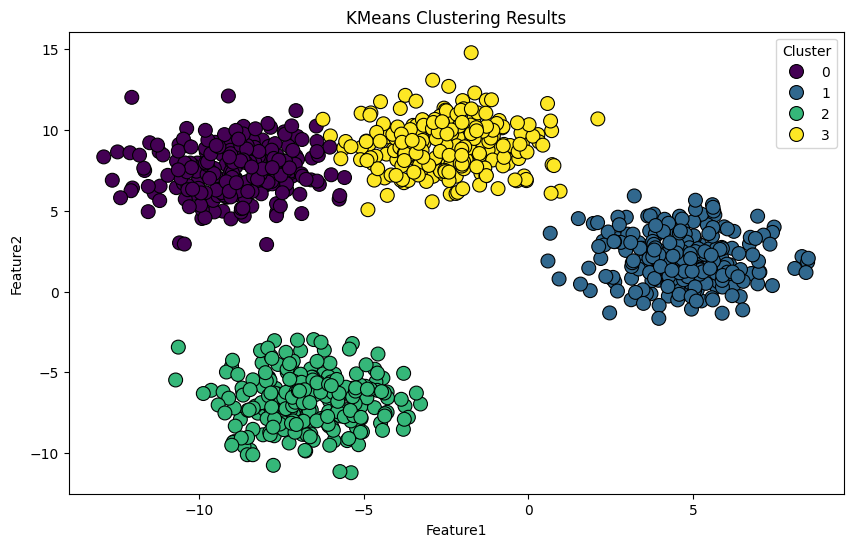

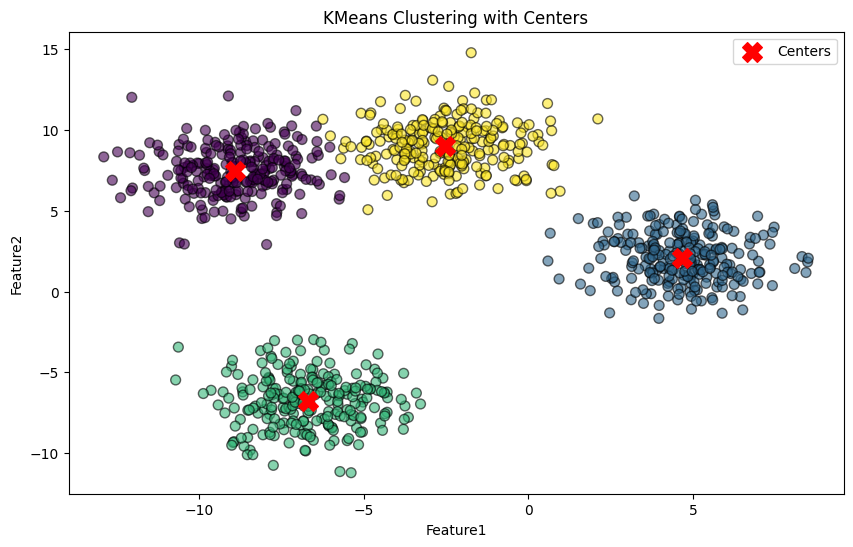

In [ ]:
# Add cluster labels to the dataframe
data['Cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=data, palette='viridis', marker='o', edgecolor='black', s=100)
plt.title('KMeans Clustering Results')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Cluster')
plt.show()

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature1'], data['Feature2'], c=y_kmeans, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title('KMeans Clustering with Centers')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Another K

In [ ]:
# Based on the elbow method, let's choose k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")

Silhouette Score for k=3: 0.6936101196676824


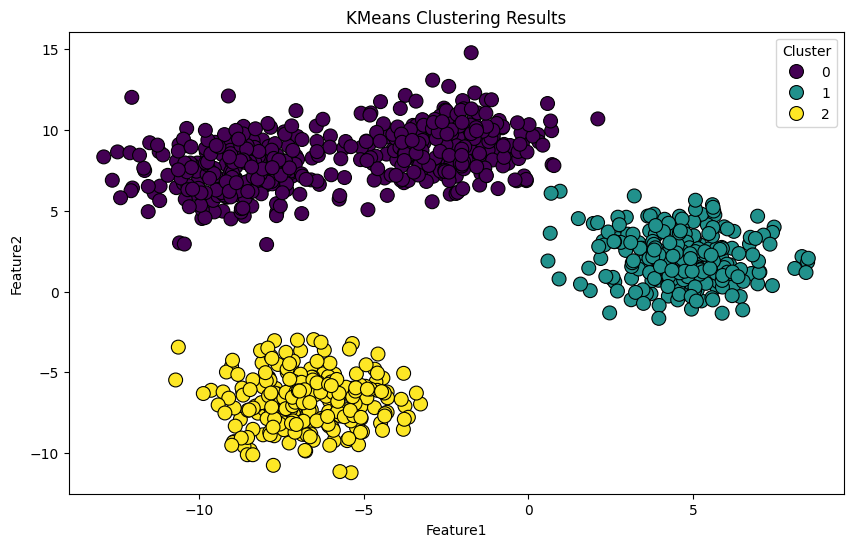

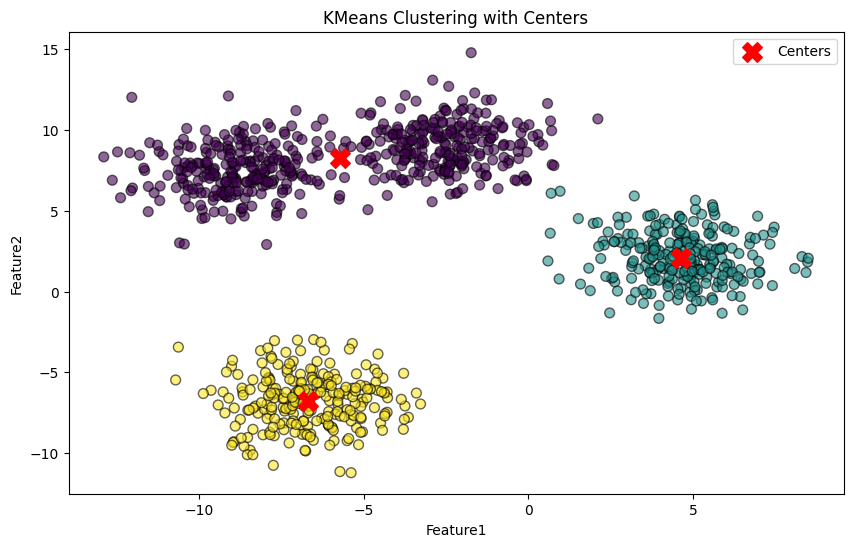

In [ ]:
# Add cluster labels to the dataframe
data['Cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=data, palette='viridis', marker='o', edgecolor='black', s=100)
plt.title('KMeans Clustering Results')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Cluster')
plt.show()

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature1'], data['Feature2'], c=y_kmeans, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title('KMeans Clustering with Centers')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()